# Demand Forecasting for Flights

**Problem Statement**: How can we accurately forecast the demand for flights bookings to optimize inventory and pricing?

### Data Features:

* Historical booking data (number of bookings per day/month/year)
* External factors (economic indicators, Covid-19 conditions, lockdown)

### Importing data and Libraries

In [24]:
import pandas as pd
import numpy as np

In [25]:
flight_data = pd.read_csv("/content/flight.xlsx - Sheet1.csv")
flight_data = flight_data.drop(columns=['Dep_Time', 'Arrival_Time'])
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
dtypes: float64(1), object(6)
memory usage: 730.4+ KB


### Observations:

0. The `Airline` column has all the airline name categories.
1. The `Date_of_journey` column has all the entries as dates with the day first format.
2. The `Source` and `Destination` columns have city names and is categorical in nature.
3. The `Route` column marks the route of all the flights with information of the stops included along with it.
4. The `Total_Stops` is also categorical in natures and has values of total stops in text and should be converted to integer marking the number of stops the flight takes between its complete route.
5. The `Addtitional_info` column has to be investigated further.
6. The `Price` column is the target column and has price as integers.

In [26]:
data = flight_data.copy()

# Create a date range from 1st March 2019 to 31st March 2020
dates = pd.date_range(start='2019-03-01', end='2020-03-31')

# Initialize an empty list to store extended data
extended_data_list = []

# Loop through each date and add rows to the list
for date in dates:
    # Determine the number of flights for the current date
    if date.year == 2019:
        flight_count = np.random.randint(150, 650)
    elif date.year == 2020 and date.month == 1:
        flight_count = np.random.randint(100, 450)
    elif date.year == 2020 and date.month == 2:
        flight_count = np.random.randint(100, 350)
    else:
        flight_count = np.random.randint(50, 100)

    # Sample data for the current date
    sampled_data = data.sample(n=flight_count, replace=True)

    # Assign the current date to Date_of_Journey
    sampled_data['Date_of_Journey'] = date

    # Append to the list
    extended_data_list.append(sampled_data)

# Concatenate the list into a single DataFrame
df_extended = pd.concat(extended_data_list, ignore_index=True)

# Simulate the decline in demand for 2020
# Assuming the 'Price' column is used to reflect demand
decline_factor = 0.8  # 20% decline in 2020
df_extended['Year'] = df_extended['Date_of_Journey'].dt.year
df_extended.loc[df_extended['Year'] == 2020, 'Price'] *= decline_factor

# Drop the 'Year' column as it was only used for the decline simulation
df_extended.drop(columns=['Year'], inplace=True)

# Ensure all columns are in the correct dtype
df_extended['Date_of_Journey'] = pd.to_datetime(df_extended['Date_of_Journey'])
df_extended['Price'] = df_extended['Price'].astype(float)

In [27]:
df_extended

,Airline,Date_of_Journey,Source,Destination,Route,Additional_Info,Price
0,Multiple carriers,2019-03-01,Delhi,Cochin,DEL → BOM → COK,No info,7408.0
1,Jet Airways,2019-03-01,Banglore,Delhi,BLR → DEL,No info,NaN
2,IndiGo,2019-03-01,Delhi,Cochin,DEL → COK,No info,5406.0
3,SpiceJet,2019-03-01,Chennai,Kolkata,MAA → CCU,No info,NaN
4,Jet Airways,2019-03-01,Kolkata,Banglore,CCU → BOM → BLR,In-flight meal not included,10844.0
...,...,...,...,...,...,...,...
138890,IndiGo,2020-03-31,Chennai,Kolkata,MAA → CCU,No info,4221.6
138891,Multiple carriers,2020-03-31,Delhi,Cochin,DEL → BOM → COK,No info,NaN
138892,Air Asia,2020-03-31,Banglore,Delhi,BLR → DEL,No info,NaN
138893,Jet Airways,2020-03-31,Delhi,Cochin,DEL → AMD → BOM → COK,No info,10255.2


In [28]:
df_extended["Date_of_Journey"].value_counts()

Date_of_Journey
2019-06-05    648
2019-07-13    645
2019-07-03    644
2019-11-28    644
2019-07-12    644
             ... 
2020-03-16     54
2020-03-28     53
2020-03-21     52
2020-03-06     52
2020-03-26     50
Name: count, Length: 397, dtype: int64

### Exploratory Data Analysis

In [29]:
# Importing viz libraries
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [30]:
daily_engagement = df_extended.groupby('Date_of_Journey').size().reset_index(name='daily_engagement')

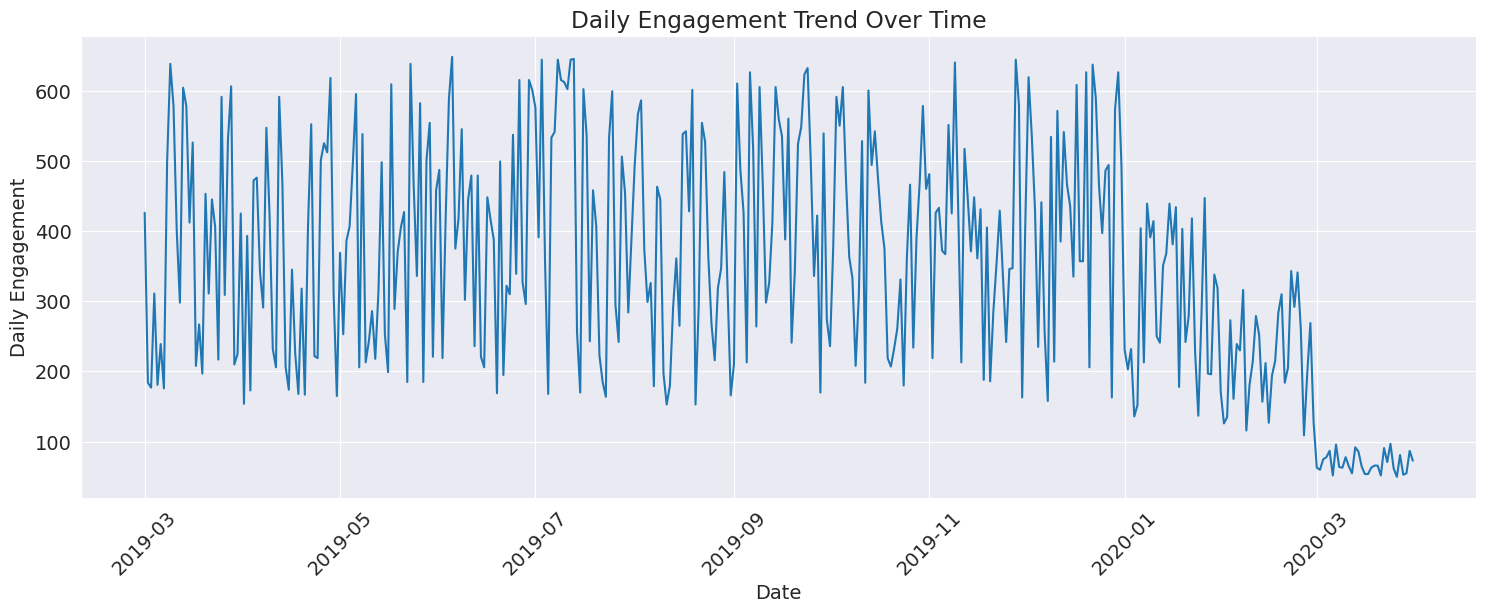

In [31]:
# Visualization: Plot the daily engagement trend over time
plt.plot(daily_engagement['Date_of_Journey'], daily_engagement['daily_engagement'], linestyle='-')
plt.title('Daily Engagement Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Engagement')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

There is the decline in flight bookings since Jan 2020, due to increasing Covid Cases.

### Feature Extraction from `Date_of_Journey` Column

In [32]:
df_extended['Date'] = df_extended['Date_of_Journey'].dt.date  # Create a new column for the date
# Extracting additional columns
df_extended['Day_of_Week'] = df_extended['Date_of_Journey'].dt.day_of_week  # Day of the week (Monday is 0 and Sunday is 6)
df_extended['Day'] = df_extended['Date_of_Journey'].dt.day  # Day of the month
df_extended['Month'] = df_extended['Date_of_Journey'].dt.month  # Month
df_extended['Year'] = df_extended['Date_of_Journey'].dt.year  # Year
df_extended['Is_Weekend'] = df_extended['Date_of_Journey'].dt.weekday // 5  # Binary indicator for the weekend (1 if Saturday or Sunday, 0 otherwise)

In [33]:
monthly_engagement = df_extended.groupby('Month').size().reset_index(name='monthly_engagement')

<ipython-input-34-8c61a3c2aec9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(monthly_engagement['monthly_engagement'], palette='viridis')


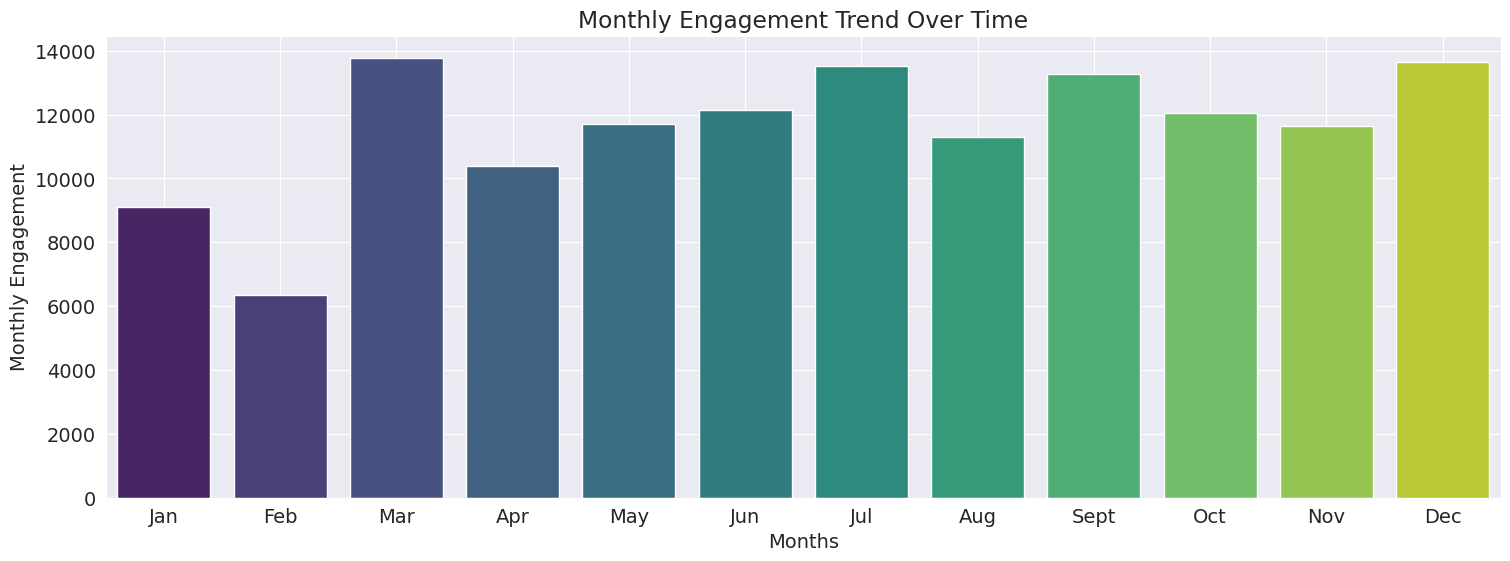

In [34]:
# Visualization: Plot the daily engagement trend over time
sns.barplot(monthly_engagement['monthly_engagement'], palette='viridis')
plt.title('Monthly Engagement Trend Over Time')
plt.xlabel('Months')
plt.ylabel('Monthly Engagement')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [35]:
weekly_engagement = df_extended.groupby('Day_of_Week').size().reset_index(name='weekly_engagement')  # Group data by day of the week and count messages

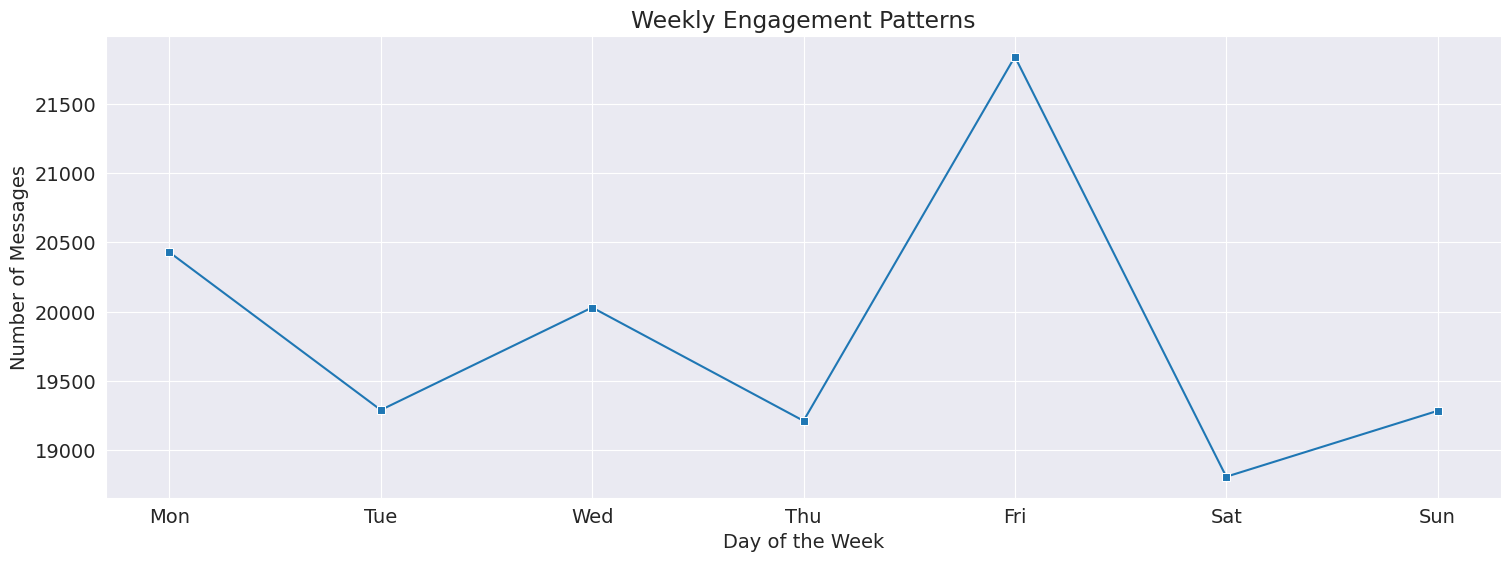

In [36]:
# Visualization: Examine weekly engagement patterns through a line chart
sns.lineplot(x='Day_of_Week', y='weekly_engagement', data=weekly_engagement, marker="s")
plt.title('Weekly Engagement Patterns')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

### Airline Column

In [37]:
df_extended['Airline'].value_counts()

Airline
Jet Airways                          49504
IndiGo                               26543
Air India                            23002
Multiple carriers                    15887
SpiceJet                             10752
Vistara                               6361
Air Asia                              4159
GoAir                                 2349
Multiple carriers Premium economy      188
Jet Airways Business                    87
Vistara Premium economy                 52
Trujet                                  11
Name: count, dtype: int64

In [47]:
df_extended['Airline'] = (df_extended['Airline']
                          .str.replace('Vistara Premium economy','Vistara')
                          .str.replace('Multiple carriers Premium economy','Multiple carriers')
                          .str.replace('Jet Airways Business','Jet Airways')
                          .str.strip()
                          .str.replace(' ','_')
                          .str.title()
                          )

array(['Indigo', 'Air_India', 'Jet_Airways', 'Spicejet',
       'Multiple_Carriers', 'Goair', 'Vistara', 'Air_Asia', 'Trujet'],
      dtype=object)

### Steps

* Replace the duplicate flight carriers and make them one.
* Strip extra whitespaces from categories.
* Replace the space between two words with "_".
* Convert the words into Title case.

<ipython-input-48-368ae3161183>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_counts.values, y=airline_counts.index, palette='viridis')


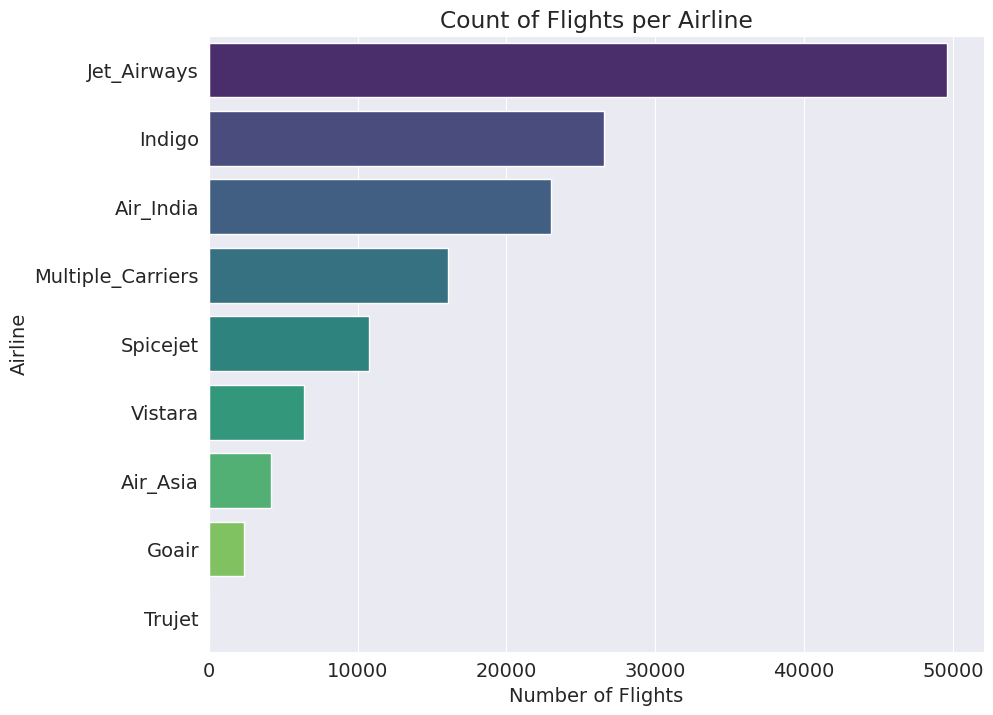

In [48]:
# Get the value counts of airlines and sort them in increasing order
airline_counts = df_extended['Airline'].value_counts().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=airline_counts.values, y=airline_counts.index, palette='viridis')

# Add titles and labels
plt.title('Count of Flights per Airline')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.show()

### Source Column

<ipython-input-39-ed9e0385fc84>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_counts.values, y=airline_counts.index, palette='viridis')


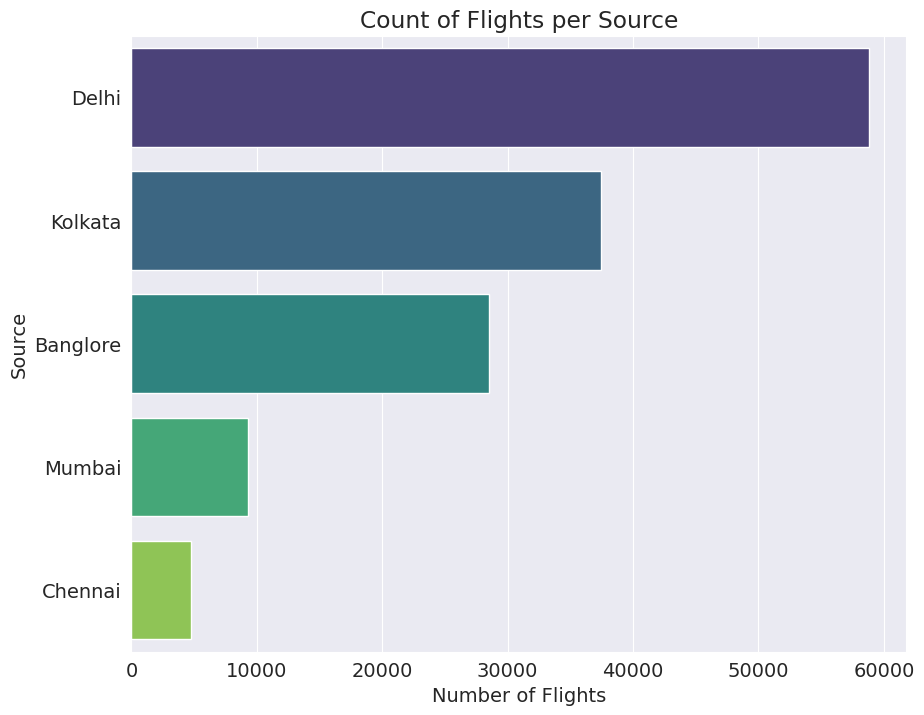

In [39]:
# Get the value counts of airlines and sort them in increasing order
airline_counts = df_extended['Source'].value_counts().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=airline_counts.values, y=airline_counts.index, palette='viridis')

# Add titles and labels
plt.title('Count of Flights per Source')
plt.xlabel('Number of Flights')
plt.ylabel('Source')
plt.show()

### Destination Column

In [40]:
df_extended['Destination'].value_counts()

Destination
Cochin       58857
Banglore     37413
Delhi        16369
New Delhi    12152
Hyderabad     9317
Kolkata       4787
Name: count, dtype: int64

* Merge the `New Delhi` and `Delhi` category together

In [19]:
df_extended['Destination'].str.replace('New Delhi','Delhi').value_counts()

Destination
Cochin       60425
Banglore     38333
Delhi        29671
Hyderabad     9352
Kolkata       4829
Name: count, dtype: int64

In [42]:
df_extended['Destination'] = (df_extended['Destination'].str.replace('New Delhi','Delhi'))

In [43]:
df_extended

,Airline,Date_of_Journey,Source,Destination,Route,Additional_Info,Price,Date,Day_of_Week,Day,Month,Year,Is_Weekend
0,Multiple carriers,2019-03-01,Delhi,Cochin,DEL → BOM → COK,No info,7408.0,2019-03-01,4,1,3,2019,0
1,Jet Airways,2019-03-01,Banglore,Delhi,BLR → DEL,No info,NaN,2019-03-01,4,1,3,2019,0
2,IndiGo,2019-03-01,Delhi,Cochin,DEL → COK,No info,5406.0,2019-03-01,4,1,3,2019,0
3,SpiceJet,2019-03-01,Chennai,Kolkata,MAA → CCU,No info,NaN,2019-03-01,4,1,3,2019,0
4,Jet Airways,2019-03-01,Kolkata,Banglore,CCU → BOM → BLR,In-flight meal not included,10844.0,2019-03-01,4,1,3,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138890,IndiGo,2020-03-31,Chennai,Kolkata,MAA → CCU,No info,4221.6,2020-03-31,1,31,3,2020,0
138891,Multiple carriers,2020-03-31,Delhi,Cochin,DEL → BOM → COK,No info,NaN,2020-03-31,1,31,3,2020,0
138892,Air Asia,2020-03-31,Banglore,Delhi,BLR → DEL,No info,NaN,2020-03-31,1,31,3,2020,0
138893,Jet Airways,2020-03-31,Delhi,Cochin,DEL → AMD → BOM → COK,No info,10255.2,2020-03-31,1,31,3,2020,0


<ipython-input-44-c312b1b9ced2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_counts.values, y=airline_counts.index, palette='viridis')


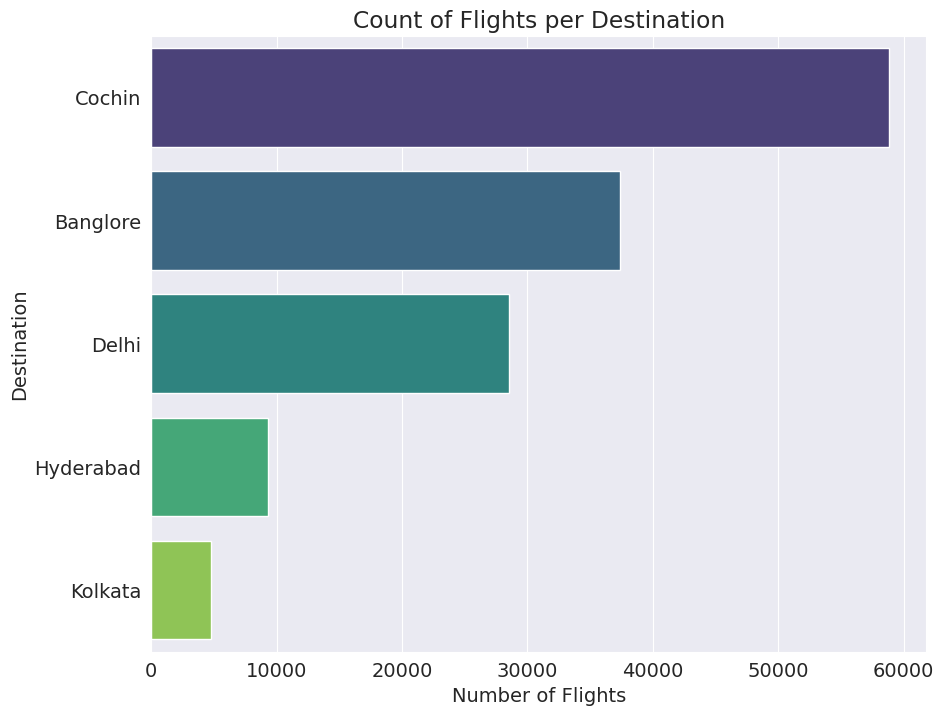

In [44]:
# Get the value counts of airlines and sort them in increasing order
airline_counts = df_extended['Destination'].value_counts().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=airline_counts.values, y=airline_counts.index, palette='viridis')

# Add titles and labels
plt.title('Count of Flights per Destination')
plt.xlabel('Number of Flights')
plt.ylabel('Destination')
plt.show()

### Additional_Info Column

In [45]:
(df_extended['Additional_Info'].unique()
)

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover',
       'Change airports', 'Red-eye flight', 'Business class', 'No Info',
       '1 Short layover', '2 Long layover'], dtype=object)

In [49]:
df_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138895 entries, 0 to 138894
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Airline          138895 non-null  object        
 1   Date_of_Journey  138895 non-null  datetime64[ns]
 2   Source           138895 non-null  object        
 3   Destination      138895 non-null  object        
 4   Route            138886 non-null  object        
 5   Additional_Info  138895 non-null  object        
 6   Price            110931 non-null  float64       
 7   Date             138895 non-null  object        
 8   Day_of_Week      138895 non-null  int32         
 9   Day              138895 non-null  int32         
 10  Month            138895 non-null  int32         
 11  Year             138895 non-null  int32         
 12  Is_Weekend       138895 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(5), object(6)
memory usage: 11.1+ 

### Price column

In [50]:
df_extended["Price"].isnull().sum()

27964

In [51]:
dfresult = df_extended.dropna(subset=['Price'])
dfresult = dfresult.reset_index()
dfresult = dfresult.drop(columns=['index'])
dfresult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110931 entries, 0 to 110930
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Airline          110931 non-null  object        
 1   Date_of_Journey  110931 non-null  datetime64[ns]
 2   Source           110931 non-null  object        
 3   Destination      110931 non-null  object        
 4   Route            110922 non-null  object        
 5   Additional_Info  110931 non-null  object        
 6   Price            110931 non-null  float64       
 7   Date             110931 non-null  object        
 8   Day_of_Week      110931 non-null  int32         
 9   Day              110931 non-null  int32         
 10  Month            110931 non-null  int32         
 11  Year             110931 non-null  int32         
 12  Is_Weekend       110931 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(5), object(6)
memory usage: 8.9+ M

In [52]:
dfresult

,Airline,Date_of_Journey,Source,Destination,Route,Additional_Info,Price,Date,Day_of_Week,Day,Month,Year,Is_Weekend
0,Multiple_Carriers,2019-03-01,Delhi,Cochin,DEL → BOM → COK,No info,7408.0,2019-03-01,4,1,3,2019,0
1,Indigo,2019-03-01,Delhi,Cochin,DEL → COK,No info,5406.0,2019-03-01,4,1,3,2019,0
2,Jet_Airways,2019-03-01,Kolkata,Banglore,CCU → BOM → BLR,In-flight meal not included,10844.0,2019-03-01,4,1,3,2019,0
3,Indigo,2019-03-01,Kolkata,Banglore,CCU → BLR,No info,4804.0,2019-03-01,4,1,3,2019,0
4,Air_India,2019-03-01,Banglore,Delhi,BLR → DEL,No info,6961.0,2019-03-01,4,1,3,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110926,Jet_Airways,2020-03-31,Kolkata,Banglore,CCU → BOM → BLR,No info,11384.8,2020-03-31,1,31,3,2020,0
110927,Spicejet,2020-03-31,Banglore,Delhi,BLR → DEL,No info,3538.4,2020-03-31,1,31,3,2020,0
110928,Indigo,2020-03-31,Chennai,Kolkata,MAA → CCU,No info,4221.6,2020-03-31,1,31,3,2020,0
110929,Jet_Airways,2020-03-31,Delhi,Cochin,DEL → AMD → BOM → COK,No info,10255.2,2020-03-31,1,31,3,2020,0


### Model Building

In [53]:
# Aggregating data by date and summing up the prices to get the total demand
df_demand = dfresult.groupby('Date_of_Journey').size().reset_index()
df_demand.columns = ['Date', 'Total_Demand_of_Flights']

In [54]:
df_demand

,Date,Total_Demand_of_Flights
0,2019-03-01,339
1,2019-03-02,147
2,2019-03-03,152
3,2019-03-04,251
4,2019-03-05,142
...,...,...
392,2020-03-27,62
393,2020-03-28,40
394,2020-03-29,45
395,2020-03-30,75


### Perform Augmented Dickey–Fuller test:

In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
print('Results of Dickey Fuller Test:')
adftest = adfuller(df_demand['Total_Demand_of_Flights'], autolag='AIC') # AIC = It gives the info about what you want in TimeSeries
                                                                # (exact or actual values) and analysis the difference btw them

# Extract and print the results
adf_statistic = adftest[0]
p_value = adftest[1]
used_lag = adftest[2]
n_obs = adftest[3]
critical_values = adftest[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Number of lags used: {used_lag}')
print(f'Number of observations: {n_obs}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

Results of Dickey Fuller Test:
ADF Statistic: -2.4270112847751903
p-value: 0.13425733866040568
Number of lags used: 8
Number of observations: 388
Critical Values:
   1%: -3.4473167281607155
   5%: -2.869018036958473
   10%: -2.5707536074503134


Note: For a Time series to be stationary, its ADCF test should have:

* `p-value` to be **low** (according to the null hypothesis)
* The `critical values` at 1%,5%,10% confidence intervals should be as **close as possible to the Test Statistics**

From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics.

Hence, we can safely say that our **Time Series** at the moment is **not stationary**.

### Applying Transformations

If the series is found to be non-stationary (typically if the p-value > 0.05), will apply transformations to make it stationary.

I will explore **differencing** and **log transformation**:

#### Differencing

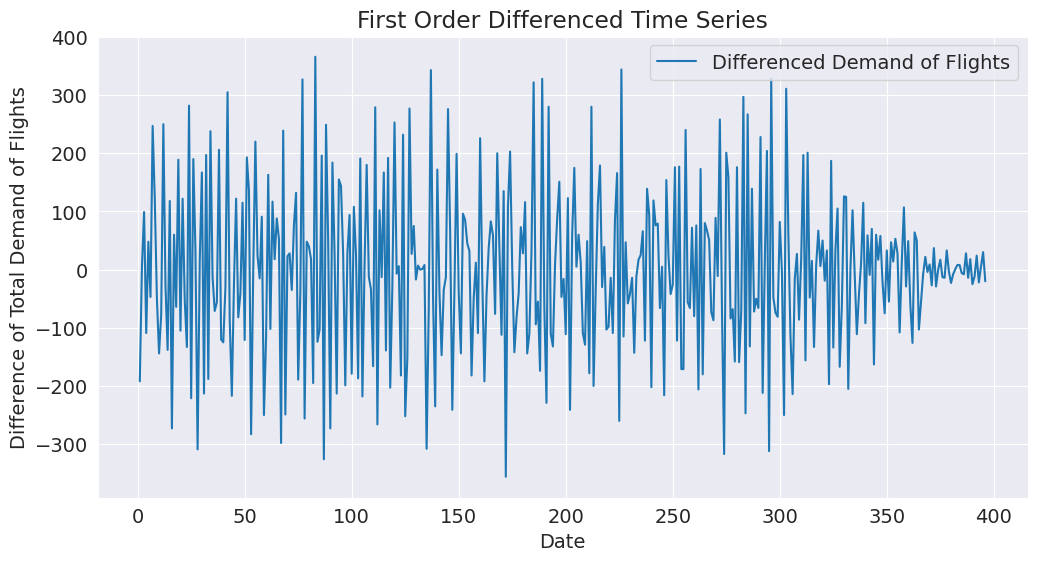

In [62]:
# Apply first order differencing
df_diff = df_demand['Total_Demand_of_Flights'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(df_diff, label='Differenced Demand of Flights')
plt.title('First Order Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Difference of Total Demand of Flights')
plt.legend()
plt.show()


#### Log Transformation

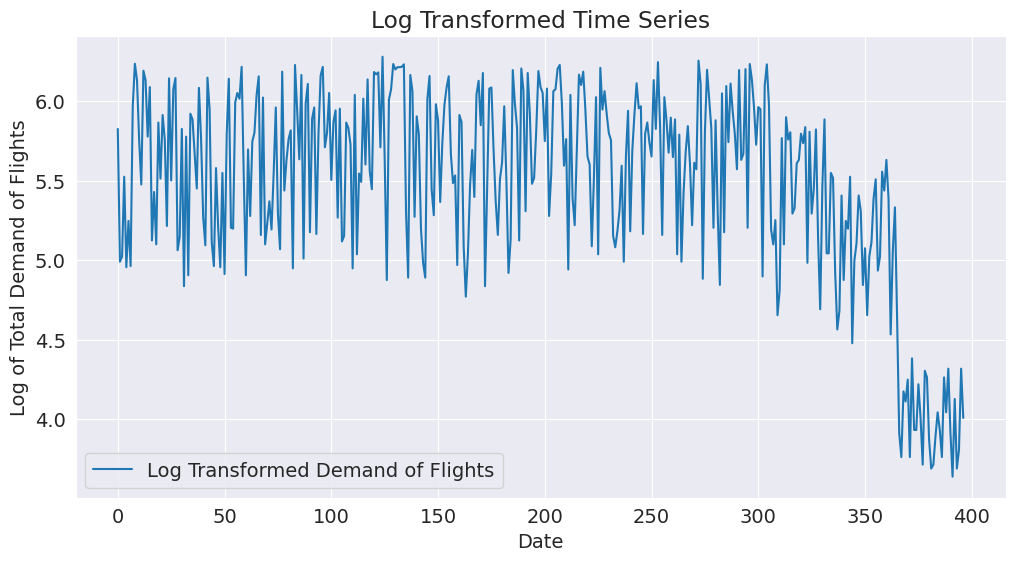

In [63]:
# Apply log transformation
df_log = np.log(df_demand['Total_Demand_of_Flights'].replace(0, np.nan)).dropna()

# Plot the log-transformed data
plt.figure(figsize=(12, 6))
plt.plot(df_log, label='Log Transformed Demand of Flights')
plt.title('Log Transformed Time Series')
plt.xlabel('Date')
plt.ylabel('Log of Total Demand of Flights')
plt.legend()
plt.show()

### Recheck Stationarity

After applying the transformations, we should recheck for stationarity using the ADF test.

In [64]:
# ADF test for the differenced data
result_diff = adfuller(df_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

# ADF test for the log-transformed data
result_log = adfuller(df_log)
print('ADF Statistic (Log Transformed):', result_log[0])
print('p-value (Log Transformed):', result_log[1])

ADF Statistic (Differenced): -11.852471088346318
p-value (Differenced): 7.15462689437556e-22
ADF Statistic (Log Transformed): -1.0678716776850299
p-value (Log Transformed): 0.7277128225258882


**Differenced Data:**

* **ADF Statistic:** A more negative value indicates stronger evidence against the null hypothesis of non-stationarity. In this case, -11.8524 is significantly negative.
* **p-value:** A very small p-value (7.15462689437556e-22) is much less than the typical significance level (0.05), meaning we can reject the null hypothesis. This indicates that the differenced series is stationary.

**Log Transformed Data:**

* **ADF Statistic:** The value -1.067871 is closer to zero, suggesting weaker evidence against non-stationarity.
* **p-value:** The p-value of 0.7277128 is much higher than 0.05, indicating that we fail to reject the null hypothesis. Thus, the log-transformed series is not stationary.

### Plotting ACF & PACF

In [65]:
#ACF & PACF plots
from statsmodels.tsa.stattools import acf, pacf

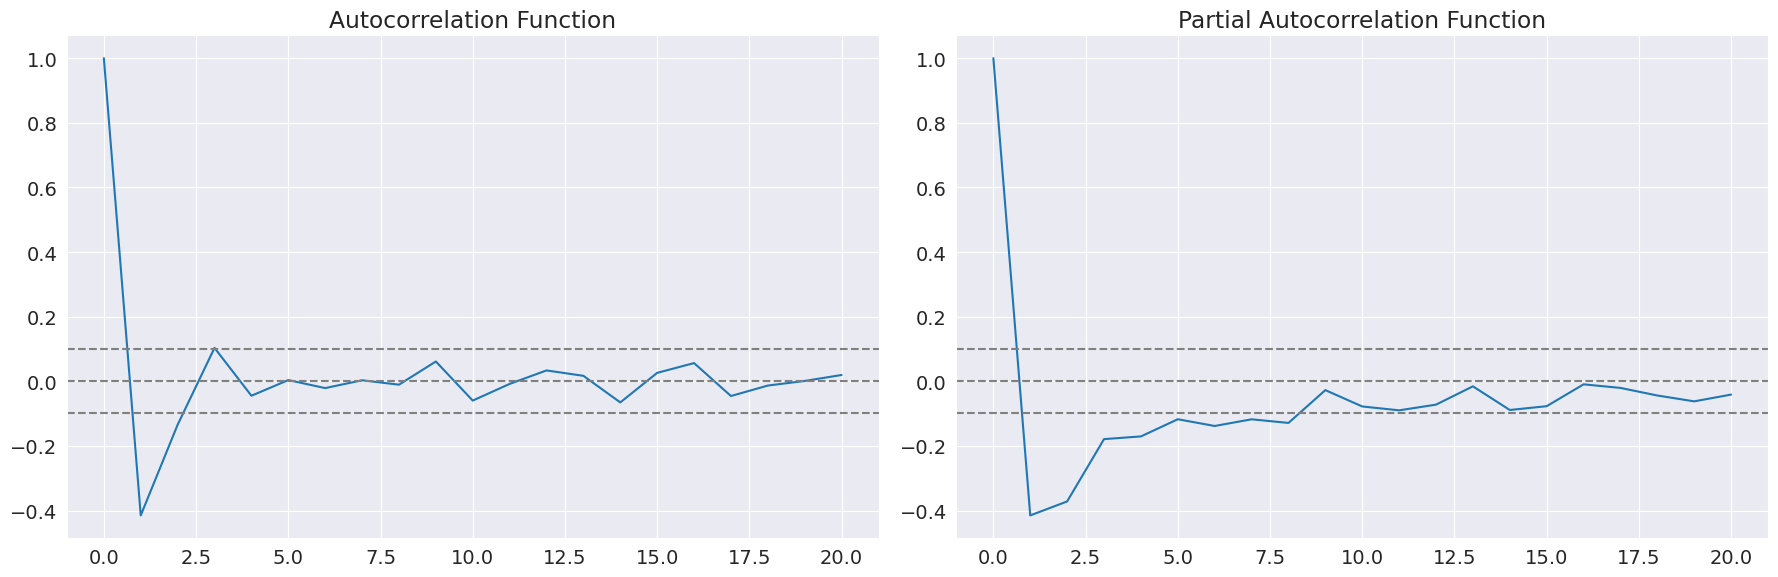

In [82]:
lag_acf = acf(df_diff, nlags=20)
lag_pacf = pacf(df_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

From the ACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, Q = 3 From the PACF graph, we see that curve touches y=0.0 line at x=13. Thus, from theory, P = 16.

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

### Building Models

ARIMA model is a combination of 3 models :

* AR (p) : Auto Regressive
* I (d) : Integrated
* MA (q) : Moving Average (p,d,q) is known as the order of the ARIMA model.

Values of these parameters are based on the above mentioned models.
* p : Number of auto regressive terms.
* d : Number of differencing orders required to make the time series stationary.
* q : Number of lagged forecast errors in the prediction equation. Selection criteria for the order of ARIMA model :

--- p : Lag value where the Partial Autocorrelation (PACF) graph cuts off or drops to 0 for the 1st instance.

--- d : Number of times differencing is carried out to make the time series stationary.

--- q : Lag value where the Autocorrelation (ACF) graph crosses the upper confidence interval for the 1st instance.

In [67]:
train_size = int(len(df_diff) * 0.8)
train, test = df_diff.iloc[:train_size], df_diff.iloc[train_size:]

In [68]:
from statsmodels.tsa.arima.model import ARIMA

* P (AR term): From the PACF graph, you identified P=16.
* Q (MA term): From the ACF graph, you identified Q=3.

ARIMA model order would therefore be (P, d, Q) = (16, d, 3), where d is the differencing order to make the series stationary.

In [84]:
# AR+I+MA = ARIMA model
model = ARIMA(df_diff, order=(16,1,3))
results_ARIMA = model.fit()
print('ARIMA model RSS:', sum(results_ARIMA.resid**2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

ARIMA model RSS: 4977029.82598806


In [118]:
fitted_values = results_ARIMA.fittedvalues

In [119]:
# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(fitted_values - df_diff))
print('Mean Absolute Error (MAE):', mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((fitted_values - df_diff) ** 2))
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 91.79131645799986
Root Mean Squared Error (RMSE): 112.10823848558225


In [122]:
from sklearn.metrics import r2_score
r2 = r2_score(df_diff, fitted_values)
print('R²:', r2)


R²: 0.3661230214417569


Since the data is highly noisy, an R² of 0.366 might be acceptable.

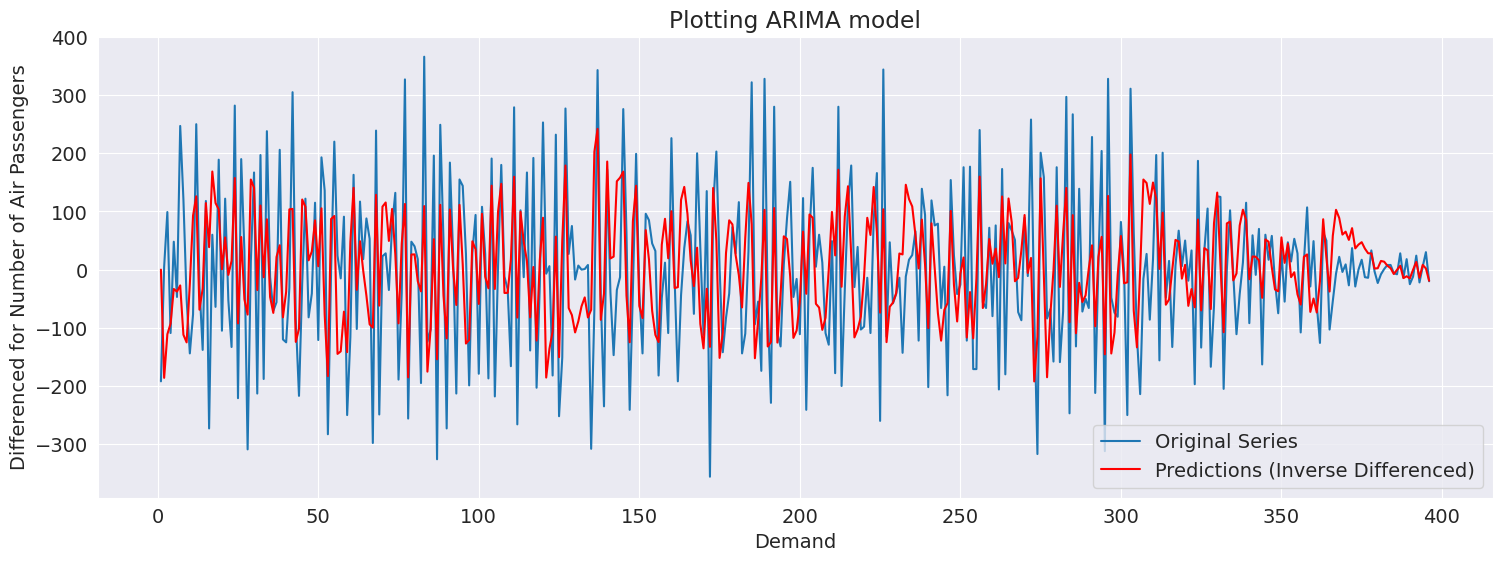

In [115]:
plt.plot(df_diff, label='Original Series')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predictions (Inverse Differenced)')
plt.xlabel('Demand')
plt.ylabel('Differenced for Number of Air Passengers')
plt.title('Plotting ARIMA model')
plt.legend()
plt.show()

### Forecasting Demand

In [ ]:
# Import the necessary plotting functionality
from statsmodels.graphics.tsaplots import plot_predict

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


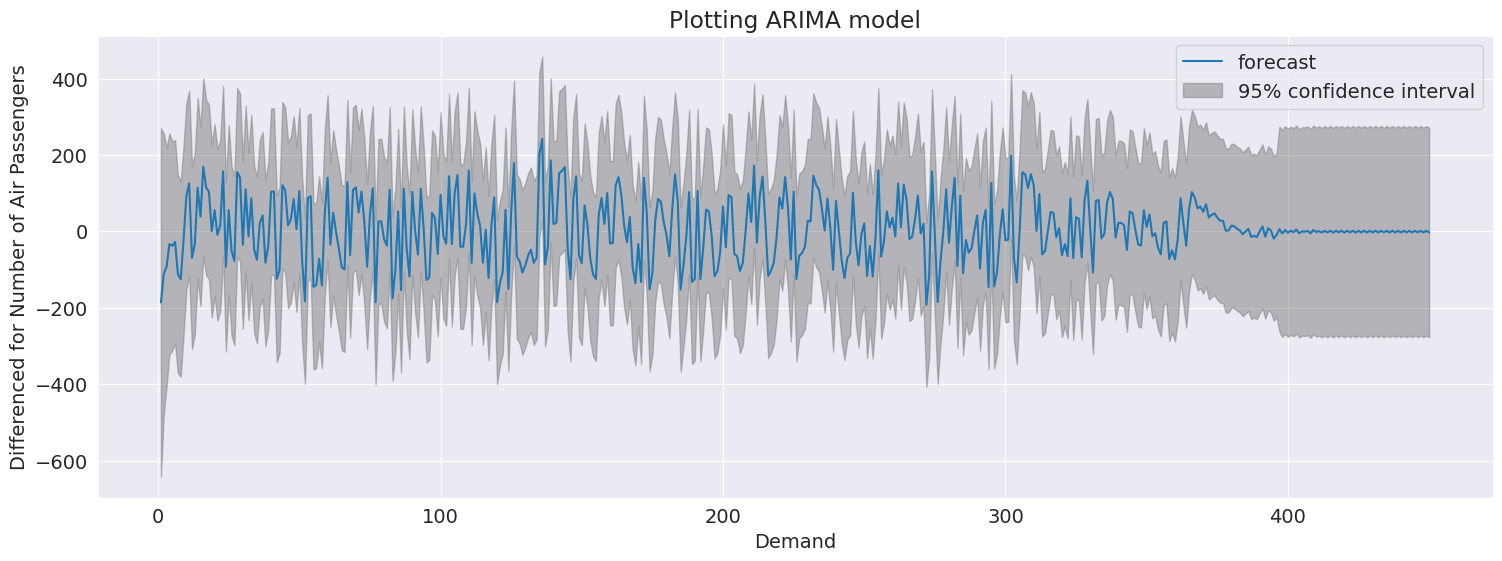

In [116]:
# Use the imported function for plotting, passing in the results object
plot_predict(results_ARIMA, start=1, end=450)
plt.xlabel('Demand')
plt.ylabel('Differenced for Number of Air Passengers')
plt.title('Plotting ARIMA model')
plt.legend()
plt.show()

Clearly, due to Covid-19, the Demand of Flights are decreasing. There is lose to our business due to World-Wide Lockdown.



### Using Ensemble Method for Better Model

In [123]:
df_demand

,Date,Total_Demand_of_Flights
0,2019-03-01,339
1,2019-03-02,147
2,2019-03-03,152
3,2019-03-04,251
4,2019-03-05,142
...,...,...
392,2020-03-27,62
393,2020-03-28,40
394,2020-03-29,45
395,2020-03-30,75


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
y = df_demand['Total_Demand_of_Flights']
x = df_demand. drop ( ['Date'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)
predictions_rf = model_rf.predict(x_test)

# Evaluate the ensemble model
r2_rf = r2_score(y_test, predictions_rf)
print('R²:', r2_rf)

R²: 0.9999374609986376


Since, for less data the R2 is has become approximately 1.

### Conculsion:

Due to Travel Restrictions and Lockdowns as countries closed their borders and restricted non-essential travel to contain the virus, the number of domestic and international flights declined.

Consequently, airlines experienced a sharp drop in passenger numbers as flights were canceled and new bookings plummeted.
